# Create Potential SNIIP List

Author: Melissa Graham & Midori Rollins

Identify potential type IIP supernovae from the "good" candidates created for all of the DDF.

To do this, we constrain the time spans and decline rate

 * Long timespan (100 days or more) in every filter.
 * Maintains same brightness for 100 days before declining


Write the list of potential SNIIP to `potential_sniip_list.txt`.

Save the plot of every potential SNIa lightcurve in the folder `all_potential_sniip_plots/`.

## Set up and read in data

In [2]:
import os
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
# import pandas as pd

# from copy import deepcopy
import time

In [3]:
clr = ['darkgreen', 'firebrick', 'saddlebrown', 'limegreen', 'orange', 'lightcoral']

all_filters = ['g','r','i']
all_fcolors = ['green','red','blue']
all_fshapes = ['o','s','^']
all_fsizes  = [5, 5, 7]

In [4]:
all_filters = ['g', 'r', 'i']
clr = ['darkgreen', 'firebrick', 'saddlebrown', 'limegreen', 'orange', 'lightcoral']
sym = ['o', 's', '^', 'o', 's', '^']
siz = [5, 5, 7, 5, 5, 7]

In [5]:
fnm = '../all_nightly_epochs_files/candidate_lightcurves.dat'

candLC_field = np.loadtxt(fnm, dtype='str', usecols=(0))
candLC_candid = np.loadtxt(fnm, dtype='str', usecols=(1))
candLC_caldate = np.loadtxt(fnm, dtype='str', usecols=(2))
candLC_mjd = np.loadtxt(fnm, dtype='float', usecols=(3))
candLC_filter = np.loadtxt(fnm, dtype='str', usecols=(4))
candLC_Nobj = np.loadtxt(fnm, dtype='int', usecols=(5))
candLC_mag = np.loadtxt(fnm, dtype='float', usecols=(6))
candLC_mage = np.loadtxt(fnm, dtype='float', usecols=(7))
candLC_mrb = np.loadtxt(fnm, dtype='float', usecols=(8))
candLC_lef = np.loadtxt(fnm, dtype='float', usecols=(9))

del fnm

In [6]:
fnm = '../all_nightly_epochs_files/candidate_lightcurve_parameters.dat'

paramLC_field = np.loadtxt( fnm, dtype='str', usecols=(0) )
paramLC_candid = np.loadtxt( fnm, dtype='str', usecols=(1) )
paramLC_tspan = np.loadtxt( fnm, dtype='float', usecols=(2) )
paramLC_tspan_g = np.loadtxt( fnm, dtype='float', usecols=(3) )
paramLC_tspan_r = np.loadtxt( fnm, dtype='float', usecols=(4) )
paramLC_tspan_i = np.loadtxt( fnm, dtype='float', usecols=(5) )
paramLC_minmag = np.loadtxt( fnm, dtype='float', usecols=(6) )
paramLC_minmag_g = np.loadtxt( fnm, dtype='float', usecols=(7) )
paramLC_minmag_r = np.loadtxt( fnm, dtype='float', usecols=(8) )
paramLC_minmag_i = np.loadtxt( fnm, dtype='float', usecols=(9) )
paramLC_amp = np.loadtxt( fnm, dtype='float', usecols=(10) )
paramLC_amp_g = np.loadtxt( fnm, dtype='float', usecols=(11) )
paramLC_amp_r = np.loadtxt( fnm, dtype='float', usecols=(12) )
paramLC_amp_i = np.loadtxt( fnm, dtype='float', usecols=(13) )
paramLC_neps = np.loadtxt( fnm, dtype='int', usecols=(14) )
paramLC_neps_g = np.loadtxt( fnm, dtype='int', usecols=(15) )
paramLC_neps_r = np.loadtxt( fnm, dtype='int', usecols=(16) )
paramLC_neps_i = np.loadtxt( fnm, dtype='int', usecols=(17) )

del fnm

## Identify potential SNe IIP

We end up using just a single line in the amplitude _vs._ time span plane. It's the dashed line in the plots below.

> **NOTE** - **2023-03-07** - the conditions have been RELAXED to allow for a larger number of potential SNIa (also SNIIP?)

Number of potential fast transients in COSMOS:  207
Number of potential fast transients in ELAIS:  205


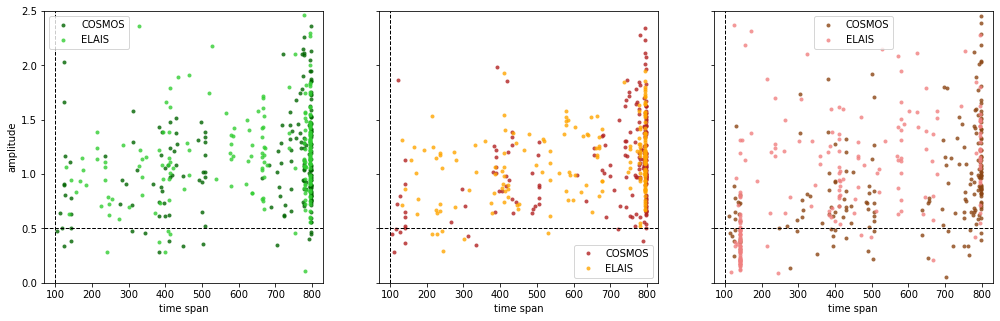

In [24]:
fig, ax = plt.subplots( 1, 3, figsize=(17,5), sharex=True, sharey=True )

### plot all the candidates in parameter space of timespan vs amplitude
tx = np.where((((paramLC_field == 'COSMOS') & (paramLC_tspan_g >= 100)) & 
               ((paramLC_tspan_r >= 100) & (paramLC_tspan_i >= 100))) & 
              ((paramLC_minmag_g < 22) | (paramLC_minmag_r < 22) | (paramLC_minmag_i < 22)) &
              ((paramLC_amp_g >= 0.5) | (paramLC_amp_r >= 0.5) | (paramLC_amp_i >= 0.5)) &
              ((paramLC_neps >= 5)))[0]
print('Number of potential fast transients in COSMOS: ',len(tx))
ax[0].plot(paramLC_tspan_g[tx], paramLC_amp_g[tx], 'o', ms=4, mew=0, alpha=0.8, color=clr[0], label='COSMOS')
ax[1].plot(paramLC_tspan_r[tx], paramLC_amp_r[tx], 'o', ms=4, mew=0, alpha=0.8, color=clr[1], label='COSMOS')
ax[2].plot(paramLC_tspan_i[tx], paramLC_amp_i[tx], 'o', ms=4, mew=0, alpha=0.8, color=clr[2], label='COSMOS')
del tx
tx = np.where((((paramLC_field == 'ELAIS') & (paramLC_tspan_g >= 100)) & 
               ((paramLC_tspan_r >= 100) & (paramLC_tspan_i >= 100))) & 
              ((paramLC_minmag_g < 22) | (paramLC_minmag_r < 22) | (paramLC_minmag_i < 22)) &
              ((paramLC_amp_g >= 0.5) | (paramLC_amp_r >= 0.5) | (paramLC_amp_i >= 0.5)) &
              ((paramLC_neps >= 5)))[0]
print('Number of potential fast transients in ELAIS: ',len(tx))
ax[0].plot(paramLC_tspan_g[tx], paramLC_amp_g[tx], 'o', ms=4, mew=0, alpha=0.8, color=clr[3], label='ELAIS')
ax[1].plot(paramLC_tspan_r[tx], paramLC_amp_r[tx], 'o', ms=4, mew=0, alpha=0.8, color=clr[4], label='ELAIS')
ax[2].plot(paramLC_tspan_i[tx], paramLC_amp_i[tx], 'o', ms=4, mew=0, alpha=0.8, color=clr[5], label='ELAIS')
del tx

for f in range(3):
    ax[f].axvline(100, lw=1, ls='dashed', color='black')
    # ax[f].axvline(20, lw=1, ls='dashed', color='black')
    ax[f].axhline(0.5, lw=1, ls='dashed', color='black')
    
paramLC_potft = np.zeros( len(paramLC_field), dtype='int' )

# paramLC_potft = (paramLC_candid[x])

### finish up the plot and show it
ax[0].set_xlim([70,830])
ax[1].set_xlim([70,830])
ax[2].set_xlim([70,830])
ax[0].set_ylim([0.,2.5])
ax[1].set_ylim([0.,2.5])
ax[2].set_ylim([0.,2.5])
ax[0].set_ylabel('amplitude')
# ax[1,0].set_ylabel('amplitude')
ax[0].set_xlabel('time span')
ax[1].set_xlabel('time span')
ax[2].set_xlabel('time span')
ax[0].legend(loc='best',fontsize=10)
ax[1].legend(loc='best',fontsize=10)
ax[2].legend(loc='best',fontsize=10)
plt.show()

I am not sure how to make cuts for SNIIP like we do for SNIa, since the decline structure is different. I'd rather not look through 400+ of these candidates either.

## Original Code for identifying potential SNe Ia

In [ ]:
# fig, ax = plt.subplots( 2, 3, figsize=(16,10), sharex=True, sharey=True )

# ### plot all the candidates in parameter space of timespan vs amplitude
# tx = np.where((paramLC_field == 'COSMOS') & (paramLC_tspan >= 10) & 
#               (paramLC_amp >= 0.5) & (paramLC_neps >= 5))[0]
# ax[0,0].plot(paramLC_tspan_g[tx], paramLC_amp_g[tx], 'o', ms=3, mew=0, alpha=0.5, color=clr[0])
# ax[0,1].plot(paramLC_tspan_r[tx], paramLC_amp_r[tx], 'o', ms=3, mew=0, alpha=0.5, color=clr[1])
# ax[0,2].plot(paramLC_tspan_i[tx], paramLC_amp_i[tx], 'o', ms=3, mew=0, alpha=0.5, color=clr[2])
# del tx
# tx = np.where((paramLC_field == 'ELAIS') & (paramLC_tspan >= 10) & 
#               (paramLC_amp >= 0.5) & (paramLC_neps >= 5))[0]
# ax[0,0].plot(paramLC_tspan_g[tx], paramLC_amp_g[tx], 'o', ms=3, mew=0, alpha=0.5, color=clr[3])
# ax[0,1].plot(paramLC_tspan_r[tx], paramLC_amp_r[tx], 'o', ms=3, mew=0, alpha=0.5, color=clr[4])
# ax[0,2].plot(paramLC_tspan_i[tx], paramLC_amp_i[tx], 'o', ms=3, mew=0, alpha=0.5, color=clr[5])
# del tx

# ### plot the polygon ranges from template light curves
# for a in range(3):
#     i = a * 2
#     j = (a * 2) + 1
#     x = poly_tspans[:]
#     y1 = poly_lcamps[i,:]
#     y2 = poly_lcamps[j,:]
#     ax[0,a].plot( x, y1, lw=1, color='black')
#     ax[0,a].plot( x, y2, lw=1, color='black')

# ### define a slightly more relaxed and easier cut, and apply it 
# x = poly_tspans[:]
# slopes = np.asarray([2.0/40, 1.5/40, 1.5/40],dtype='float')
# yints  = np.asarray([2.0-slopes[0]*70, 1.5-slopes[1]*70, 1.5-slopes[2]*80],dtype='float')
# for f in range(3):
#     y = slopes[f]*x + yints[f]
#     ax[0,f].plot(x, y, lw=2, ls='dashed', color='black')
#     ax[0,f].axvline(10, lw=2, ls='dashed', color='black')
#     ax[0,f].axhline(0.5, lw=2, ls='dashed', color='black')
#     ax[1,f].plot(x, y, lw=1, ls='dashed', color='black')
#     ax[1,f].axvline(10, lw=2, ls='dashed', color='black')
#     ax[1,f].axhline(0.5, lw=2, ls='dashed', color='black')
# del x, y

# print('For the dashed lines in the plots below.')
# print('%-6s %-6s %-6s' % ('filter','slope','y-int'))
# print('%-6s %6.3f %6.3f' % ('g',slopes[0],yints[0]))
# print('%-6s %6.3f %6.3f' % ('r',slopes[1],yints[1]))
# print('%-6s %6.3f %6.3f' % ('i',slopes[2],yints[2]))

# ### create an array for flagging potential SNIa (1 = yes)
# paramLC_potSNIa = np.zeros( len(paramLC_field), dtype='int' )

# tx = np.where( (paramLC_tspan >= 10) & (paramLC_amp >= 0.5) & (paramLC_neps >= 5) )[0]
# for t in tx:
#     cntr = 0
#     glow = slopes[0]*paramLC_tspan_g[t] + yints[0]
#     rlow = slopes[1]*paramLC_tspan_r[t] + yints[1]
#     ilow = slopes[2]*paramLC_tspan_i[t] + yints[2]
#     if (glow <= paramLC_amp_g[t]) & (paramLC_amp_g[t] >= 0.5) & \
#        (paramLC_tspan_g[t] >= 10) & (paramLC_tspan_g[t] <= 200) & \
#        (paramLC_neps_g[t] >= 5):
#         cntr += 1
#     if (rlow <= paramLC_amp_r[t]) & (paramLC_amp_r[t] >= 0.5) & \
#        (paramLC_tspan_r[t] >= 10) & (paramLC_tspan_r[t] <= 200) & \
#        (paramLC_neps_r[t] >= 5):
#         cntr += 1
#     if (ilow <= paramLC_amp_i[t]) & (paramLC_amp_i[t] >= 0.5) & \
#         (paramLC_tspan_i[t] >= 10) & (paramLC_tspan_i[t] <= 200) & \
#         (paramLC_neps_i[t] >= 5):
#         cntr += 1

#     if (cntr == 2) | (cntr == 3):
#         paramLC_potSNIa[t] = 1
    
#     del glow,rlow,ilow,cntr
# del tx, slopes, yints

# print(' ')
# ### overplot the potential SNeIa
# tx = np.where( (paramLC_potSNIa == 1) & (paramLC_field == 'COSMOS') )[0]
# print('Number of potential sneia in COSMOS: ',len(tx))
# ax[1,0].plot( paramLC_tspan_g[tx], paramLC_amp_g[tx], '*', ms=8, mew=0, alpha=0.7, color=clr[0] )
# ax[1,1].plot( paramLC_tspan_r[tx], paramLC_amp_r[tx], '*', ms=8, mew=0, alpha=0.7, color=clr[1] )
# ax[1,2].plot( paramLC_tspan_i[tx], paramLC_amp_i[tx], '*', ms=8, mew=0, alpha=0.7, color=clr[2] )
# del tx
# tx = np.where( (paramLC_potSNIa == 1) & (paramLC_field == 'ELAIS') )[0]
# print('Number of potential sneia in ELAIS: ',len(tx))
# ax[1,0].plot( paramLC_tspan_g[tx], paramLC_amp_g[tx], '*', ms=8, mew=0, alpha=0.7, color=clr[3] )
# ax[1,1].plot( paramLC_tspan_r[tx], paramLC_amp_r[tx], '*', ms=8, mew=0, alpha=0.7, color=clr[4] )
# ax[1,2].plot( paramLC_tspan_i[tx], paramLC_amp_i[tx], '*', ms=8, mew=0, alpha=0.7, color=clr[5] )
# del tx

# ### finish up the plot and show it
# ax[0,0].set_xlim([0,150])
# ax[0,1].set_xlim([0,150])
# ax[0,2].set_xlim([0,150])
# ax[0,0].set_ylim([0.,2.5])
# ax[0,1].set_ylim([0.,2.5])
# ax[0,2].set_ylim([0.,2.5])
# ax[0,0].set_ylabel('amplitude')
# ax[1,0].set_ylabel('amplitude')
# ax[1,0].set_xlabel('time span')
# ax[1,1].set_xlabel('time span')
# ax[1,2].set_xlabel('time span')
# plt.show()